![imagen](./img/seaborn.png)


# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una variable numérica
- Una variable categórica
- Dos variables numéricas
- Tres o más variables numéricas
- Dos variables categóricas
- Variables numéricas y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [ ]:
# !pip install seaborn

In [2]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [11]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])
boston_df = pd.DataFrame(load_boston()["data"],columns=load_boston()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]
boston_df["target"] = load_boston()["target"]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("data/suicide.csv")

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](./img/dtypes.png)

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

In [28]:
titanic_df['Fare'].mode()

0    8.05
dtype: float64

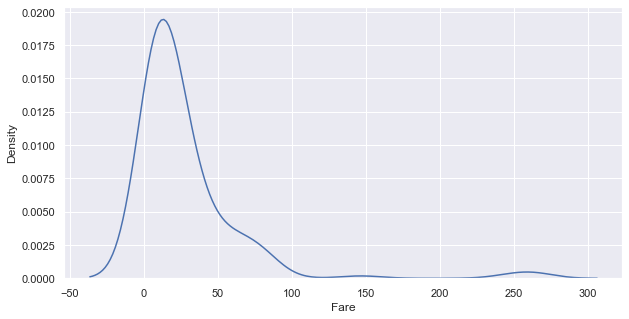

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"], hist = False);

#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

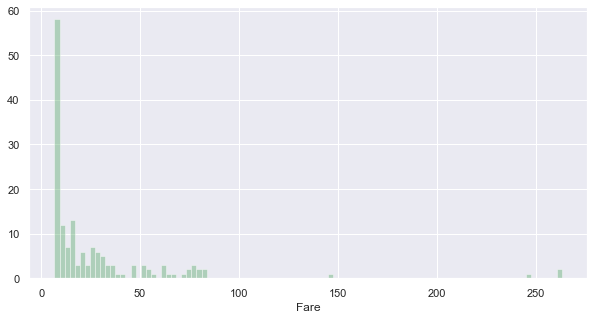

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
             kde=False,
             color='g',
             bins=100);
# plt.xlim(0,20)

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

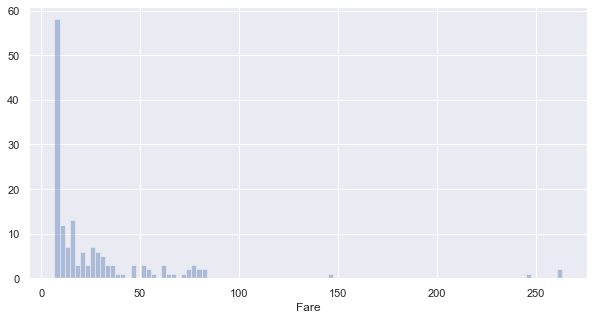

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
             kde=False,
            bins=100);

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

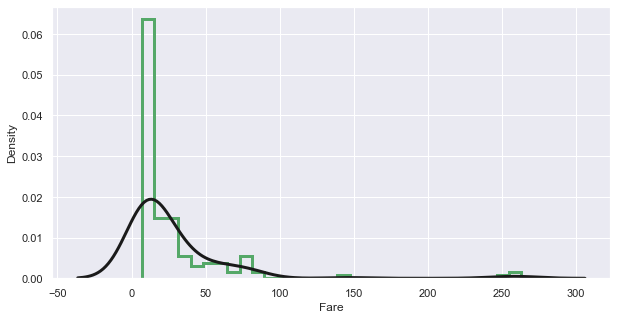

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

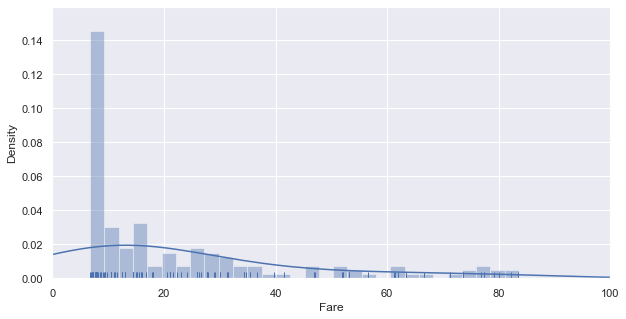

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True,
            bins=100)
plt.xlim(0, 100);

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

In [60]:
p_0 = np.percentile(titanic_df["Fare"], 0) #Q0 #Min
p_25 = np.percentile(titanic_df["Fare"], 25) #Q1
p_50 = np.percentile(titanic_df["Fare"], 50) #Q2 #Mediana
p_75 = np.percentile(titanic_df["Fare"], 75) #Q3
p_100 = np.percentile(titanic_df["Fare"], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(titanic_df["Fare"].mean(),2) )

Valor del percentil 0: 6.75
Valor del percentil 25: 8.00315
Valor del percentil 50: 14.4542
Valor del percentil 75: 30.37185
Valor del percentil 100: 263.0
Valor media: 28.11


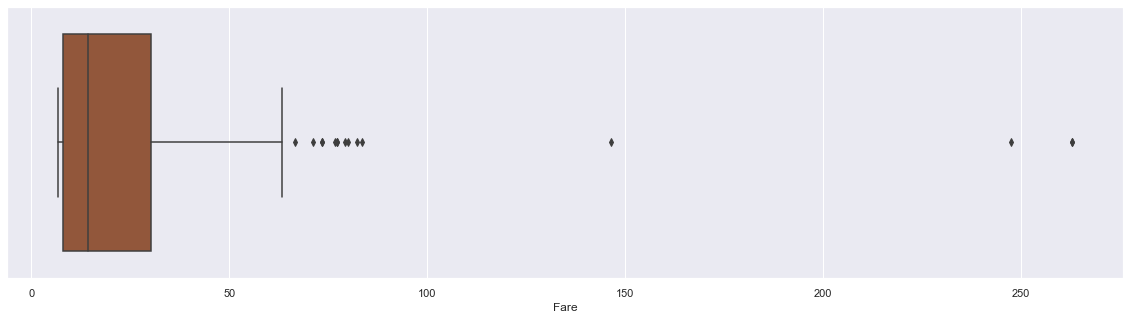

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df["Fare"], color="sienna");
# plt.xlim(0,50)

![imagen](./img/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

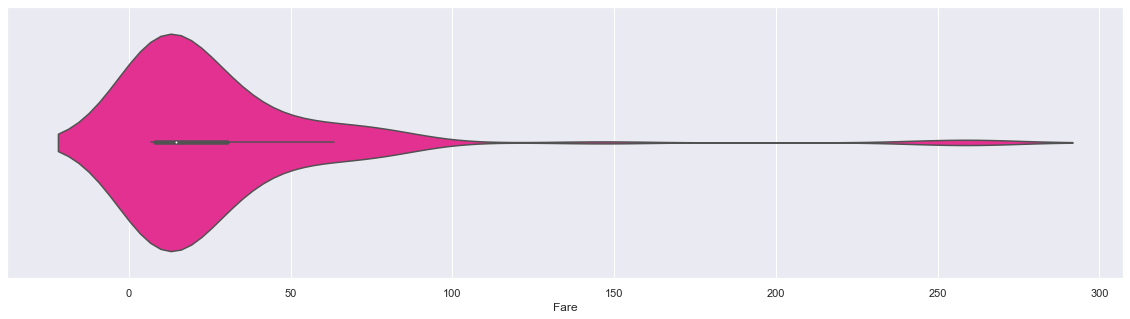

In [14]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df["Fare"], color='deeppink');

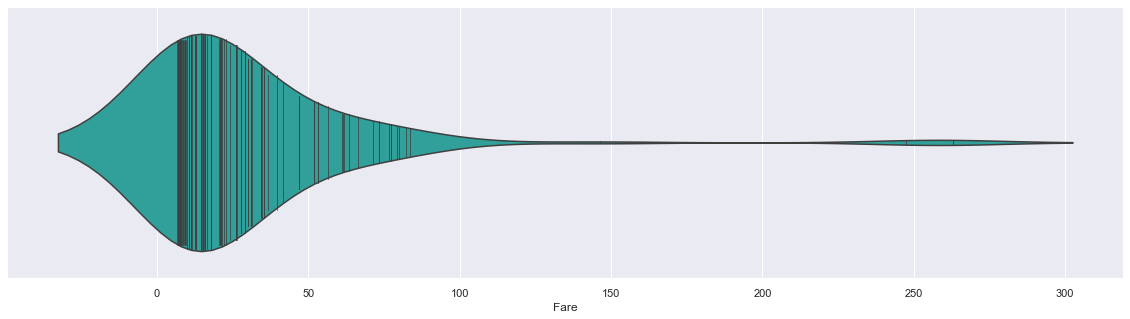

In [65]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df["Fare"], color='lightseagreen', bw=.5, inner="stick");

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [72]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

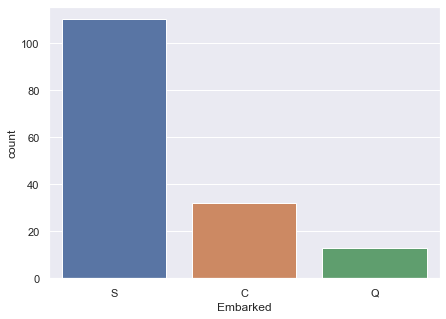

In [73]:
plt.figure(figsize=(7,5))
sns.countplot(titanic_df["Embarked"]);

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [74]:
# conteo

In [76]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [77]:
market_df['Product line'].value_counts(ascending=True)

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

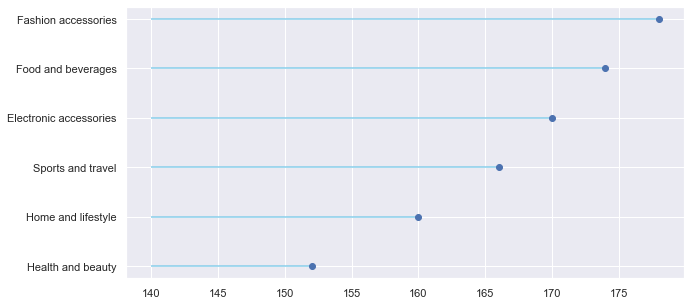

In [78]:
conteo = market_df['Product line'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

In [79]:
titanic_df["Embarked"].value_counts()

S    110
C     32
Q     13
Name: Embarked, dtype: int64

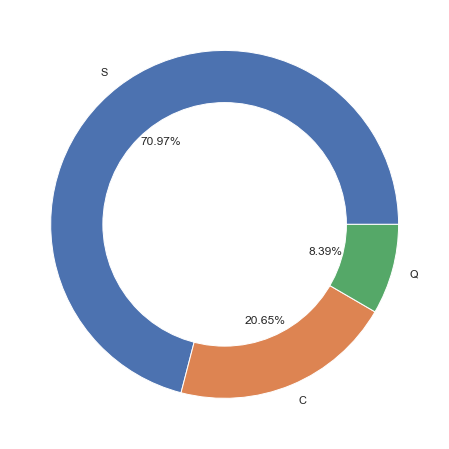

In [98]:
import matplotlib.pyplot as plt
 
# create data
data = titanic_df["Embarked"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')

p=plt.gcf()
p.gca().add_artist(my_circle);

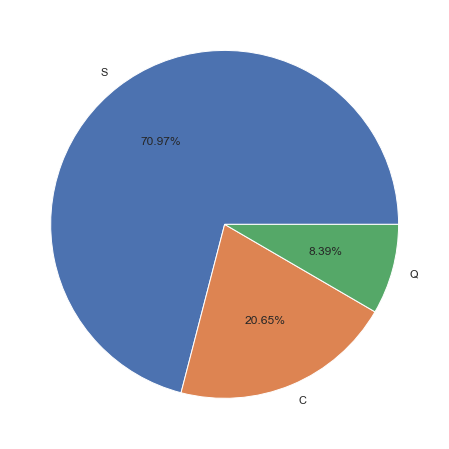

In [94]:
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf();

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [100]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


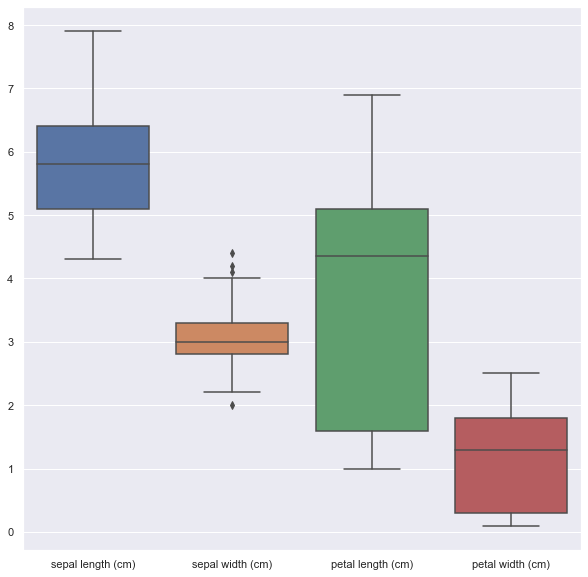

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]]);

El boxplot está bien, pero haay algo de información que se nos escapa

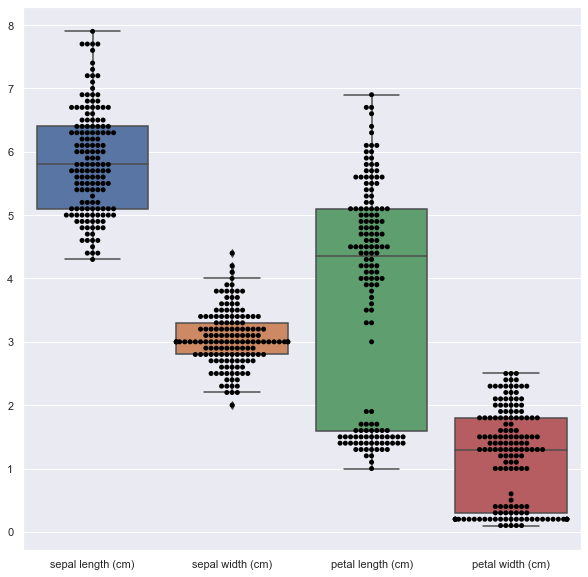

In [85]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
             color="black", edgecolor="gray");

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

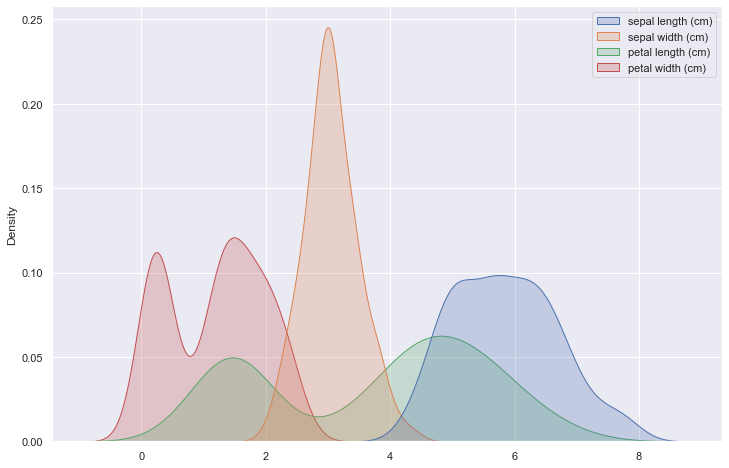

In [101]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:4]], shade=True);

#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

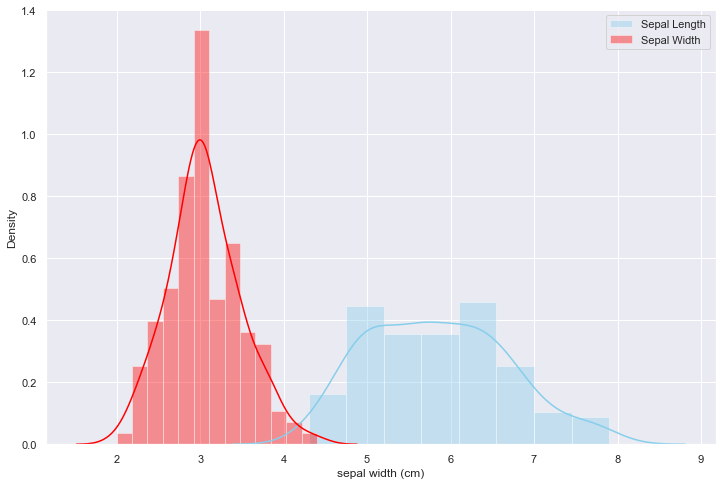

In [87]:
plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length")
sns.distplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width")
plt.legend();

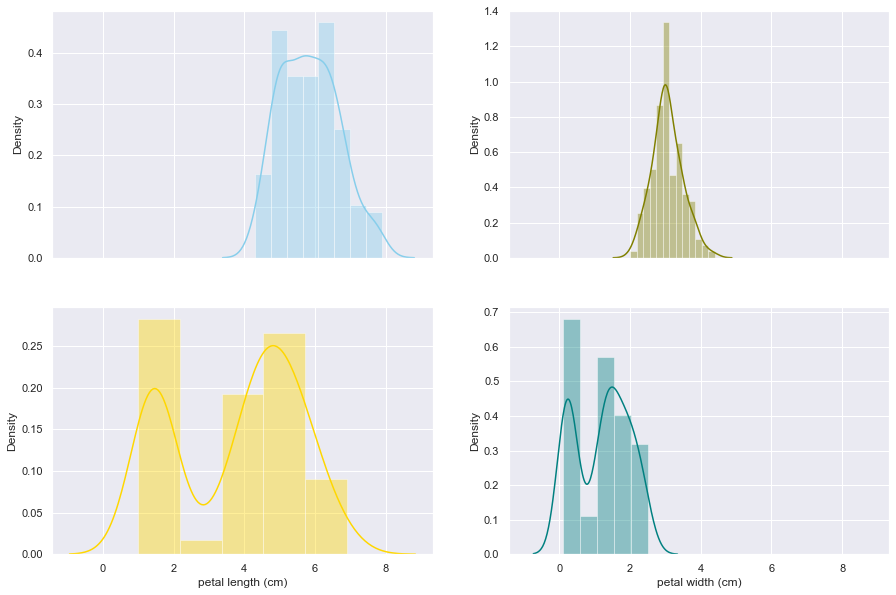

In [103]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [105]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


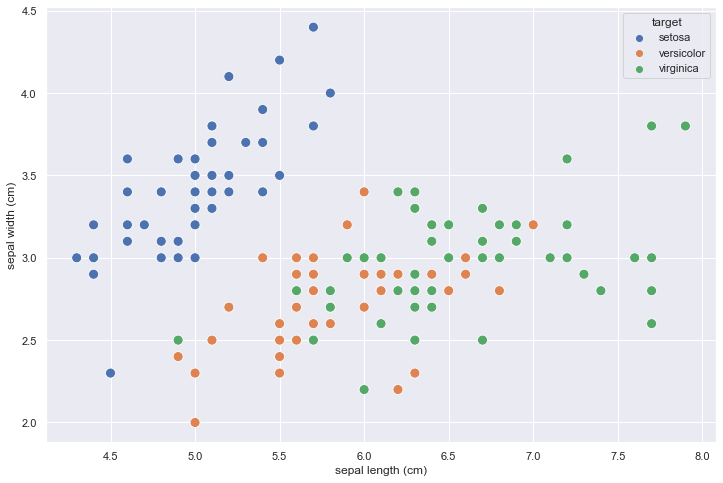

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=iris_df['sepal length (cm)'],
                y=iris_df['sepal width (cm)'],
                hue = iris_df['target'],
               s=100);

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

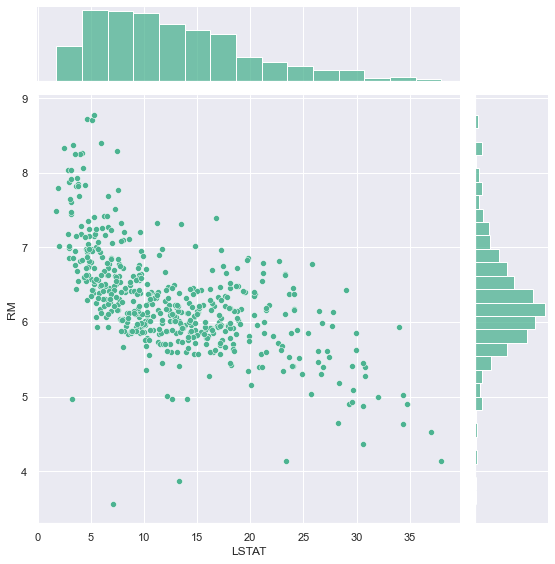

In [107]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              color="#4CB391",
             height = 8);

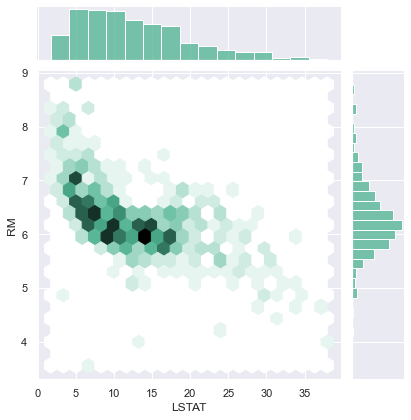

In [112]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="hex",
              color="#4CB391");

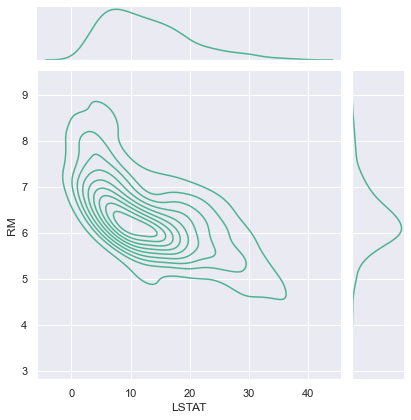

In [92]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde",
              color="#4CB391");

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [113]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


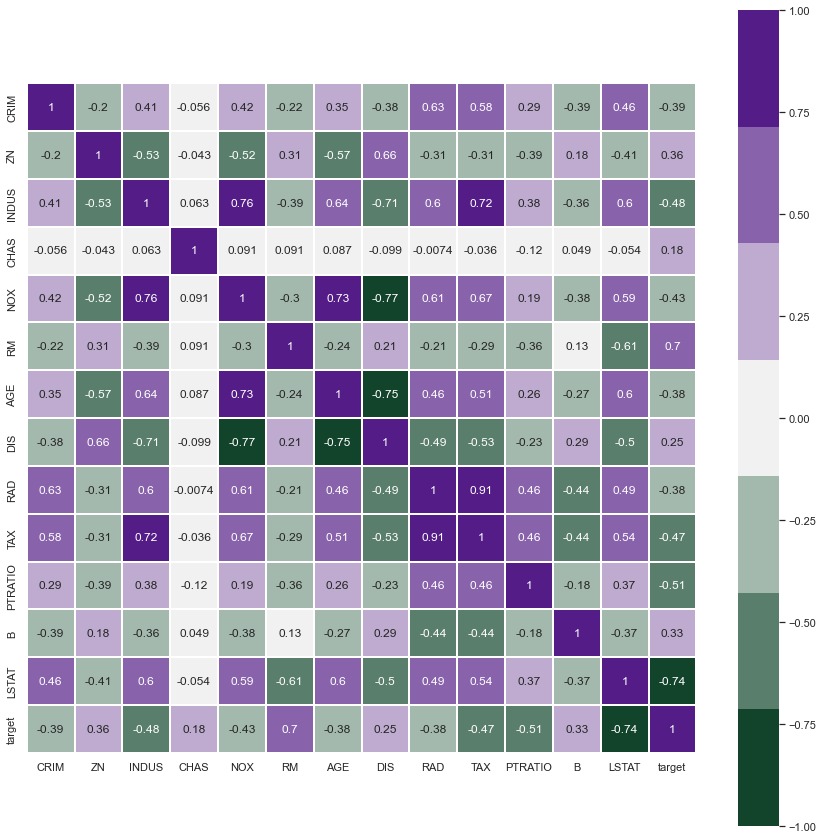

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(boston_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

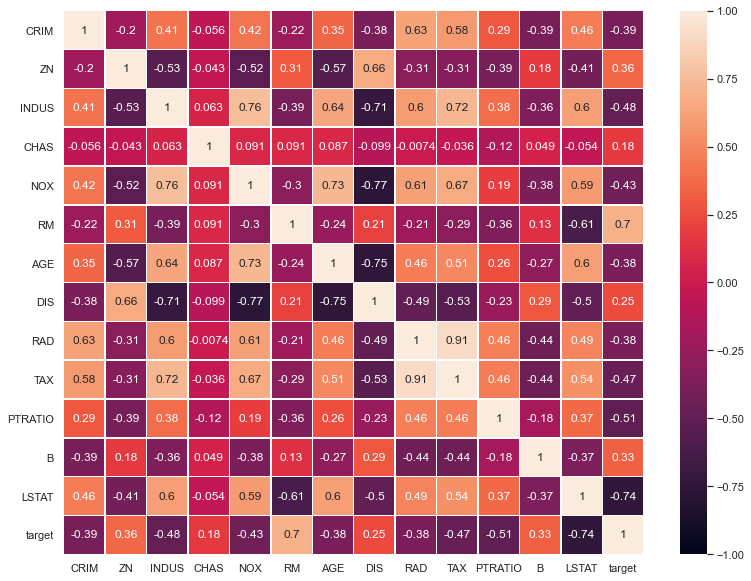

In [94]:
# EJEMPLO DE MALA ESCALA DE COLORES
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [127]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [124]:
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]

In [125]:
data

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


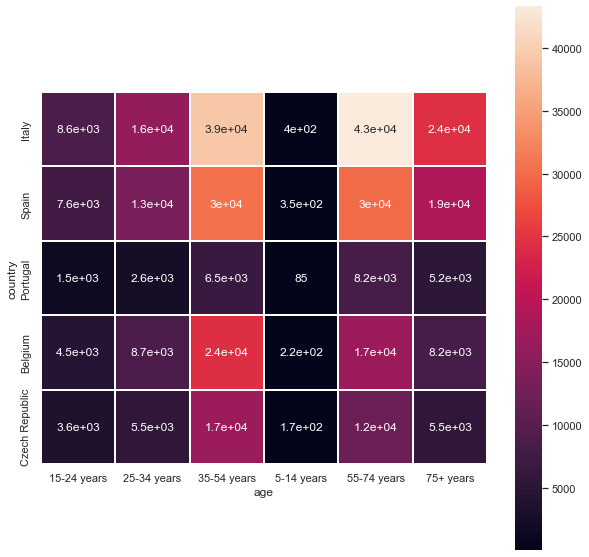

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3,
            annot=True);

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas varaibles porque no se va a ver bien. Hazlo por partes.

In [129]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

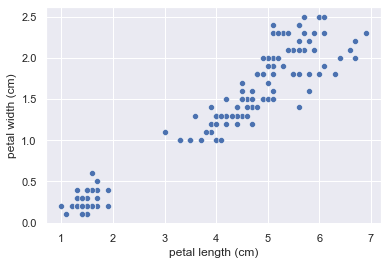

In [134]:
sns.scatterplot(iris_df['petal length (cm)'], iris_df['petal width (cm)'])


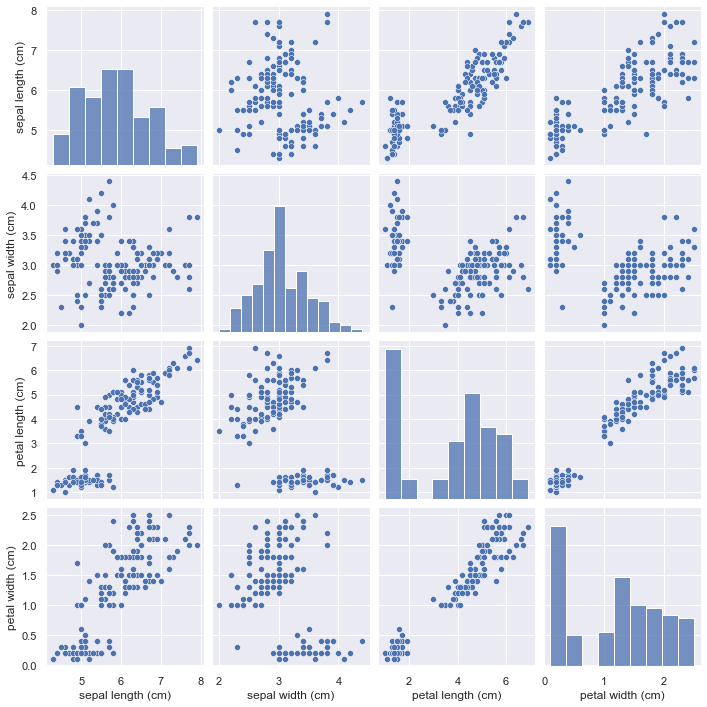

In [135]:
sns.pairplot(iris_df);

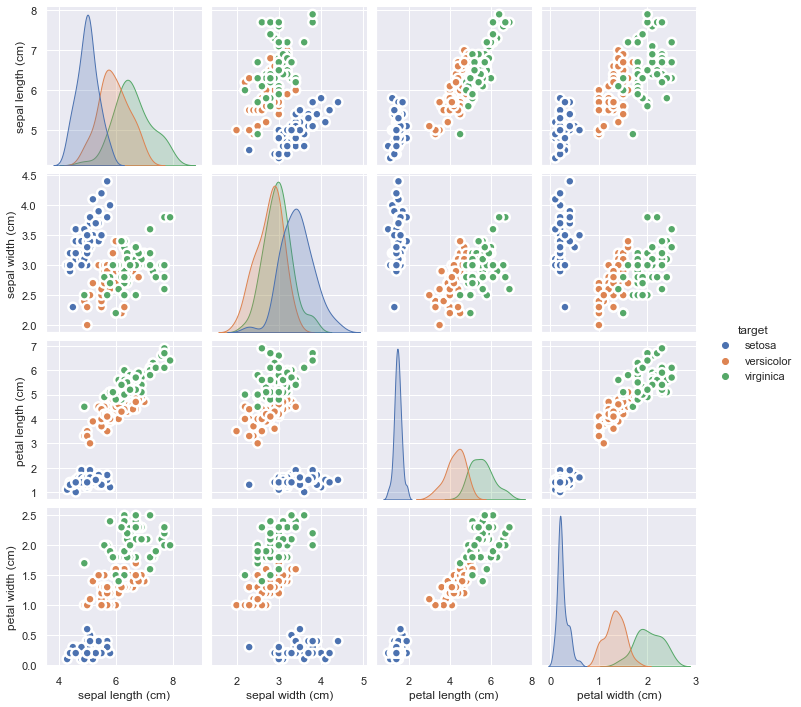

In [136]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             plot_kws=dict(s=80, edgecolor="white",
                           linewidth=2.5));

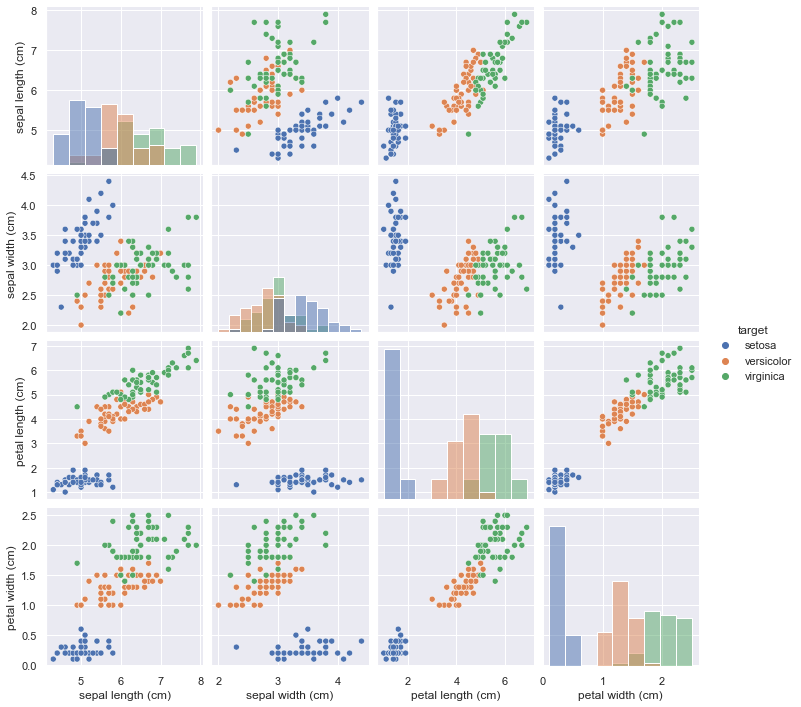

In [99]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             diag_kind="hist");

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [100]:
pd.crosstab(titanic_df["Embarked"],
            titanic_df["Sex"],
            margins = False) 

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

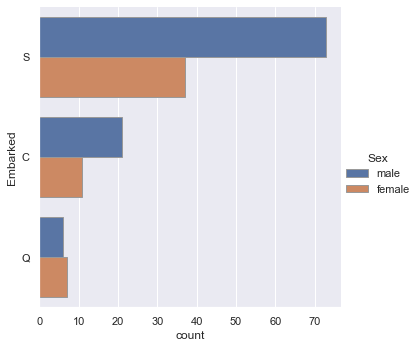

In [137]:
sns.catplot(y="Embarked",
            hue="Sex",
            kind="count",
            edgecolor=".6",
            orient = "H",
            data=titanic_df);

Otra manera de visualizar dos o más variables categóricas

<Figure size 2160x720 with 0 Axes>

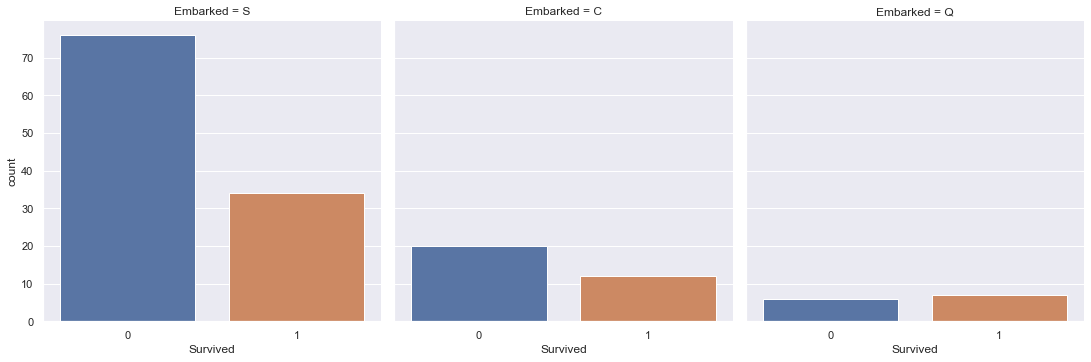

In [102]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=4,
            data=titanic_df,
            kind="count");

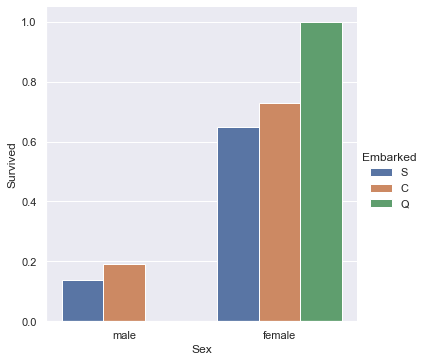

In [103]:
sns.catplot(x="Sex",
            y="Survived",
            hue="Embarked",
            kind="bar",
            data=titanic_df,
            ci=None); # Para que elimine las barras de error

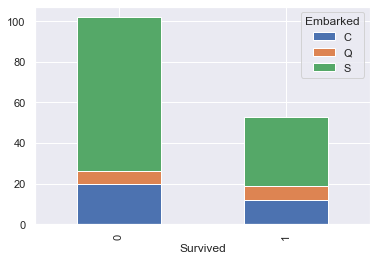

In [104]:
df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked',
                                                                                  index='Survived',
                                                                                  values=0)
df_plot.plot(kind='bar', stacked=True);

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [105]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)

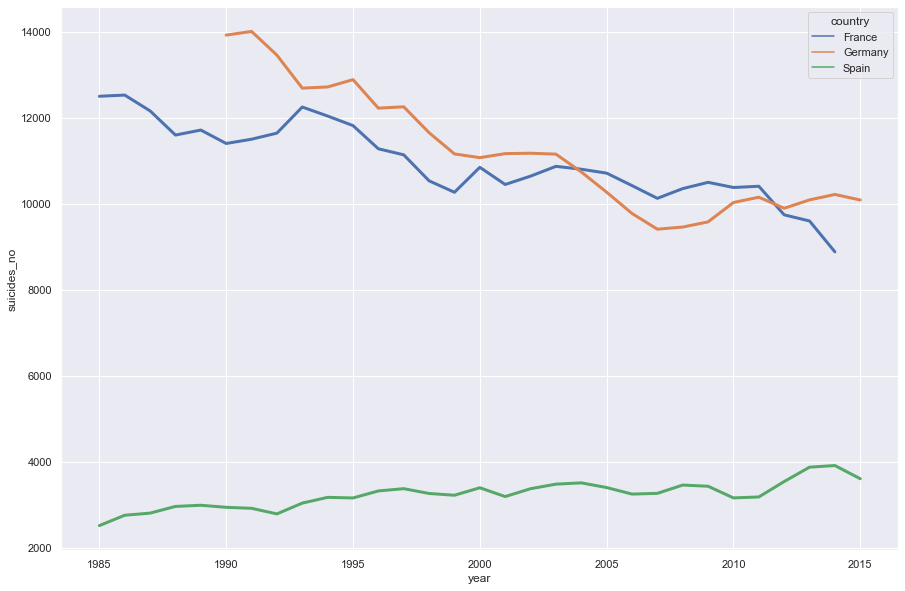

In [106]:
plt.figure(figsize=(15,10))
sns.lineplot(data=suicid_df2,
             x="year",
             y="suicides_no",
             hue="country",
            linewidth = 3);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [ ]:
# !pip install squarify

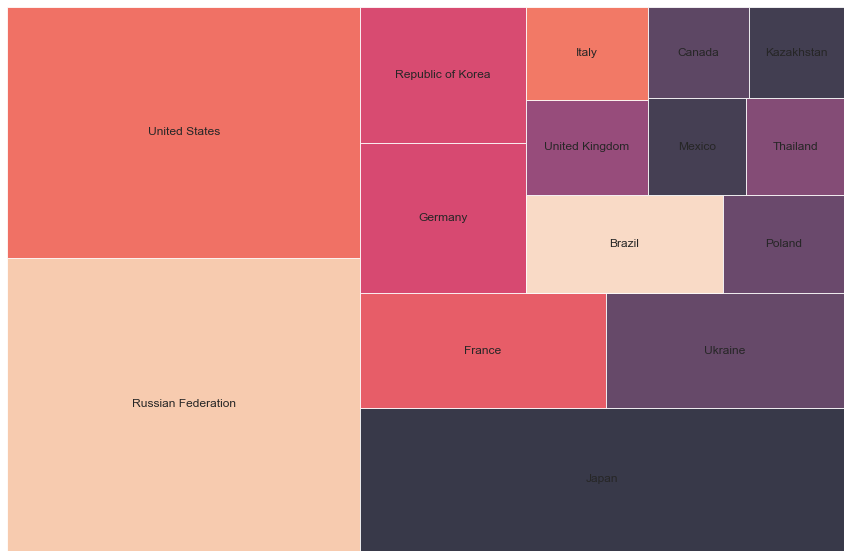

In [108]:
import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:15]

plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.show()

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

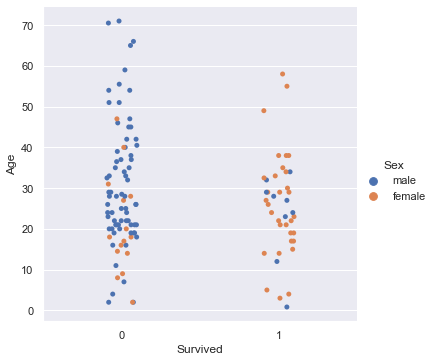

In [109]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=titanic_df);

El equivalente con un diagrama de caja sería el siguiente

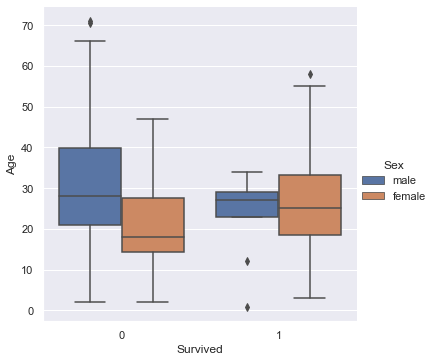

In [110]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

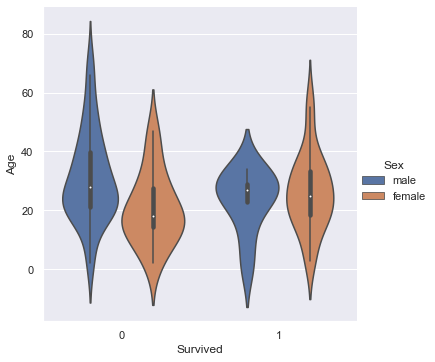

In [111]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

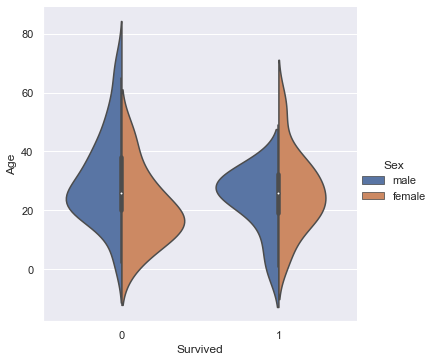

In [112]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split=True, data=titanic_df);

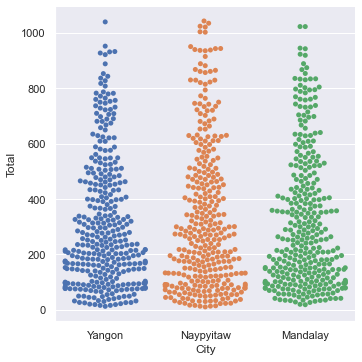

In [113]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

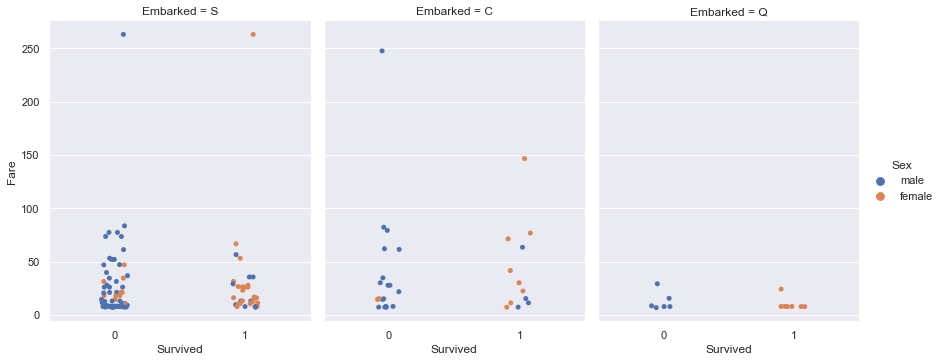

In [114]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

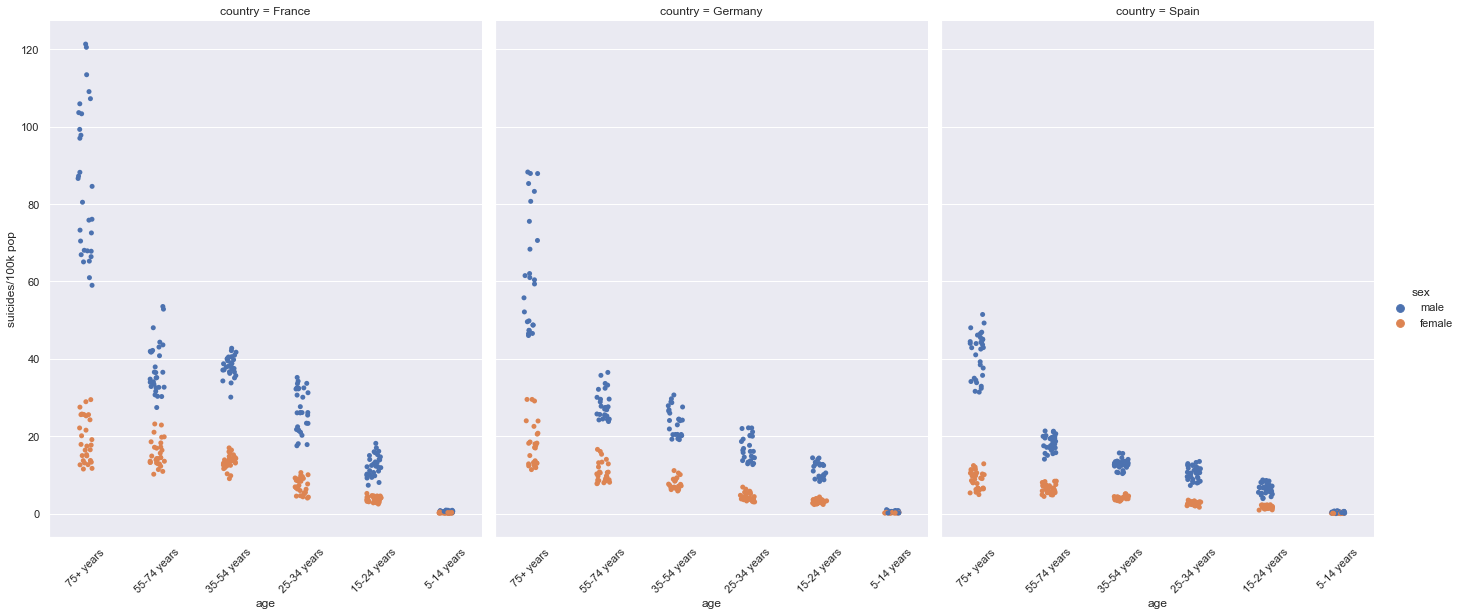

In [115]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x="age",
            y="suicides/100k pop",
            hue="sex",
            col="country",
            data=suicid_df2,
            height=8,
            aspect=.8)
chart.set_xticklabels(rotation=45);

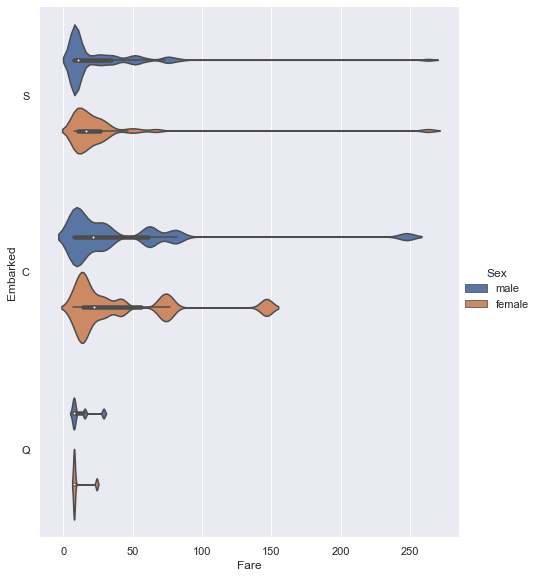

In [127]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

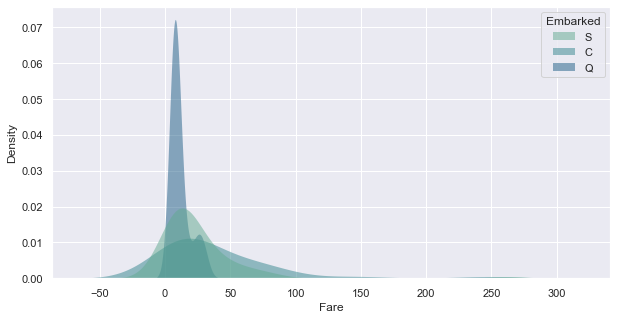

In [117]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

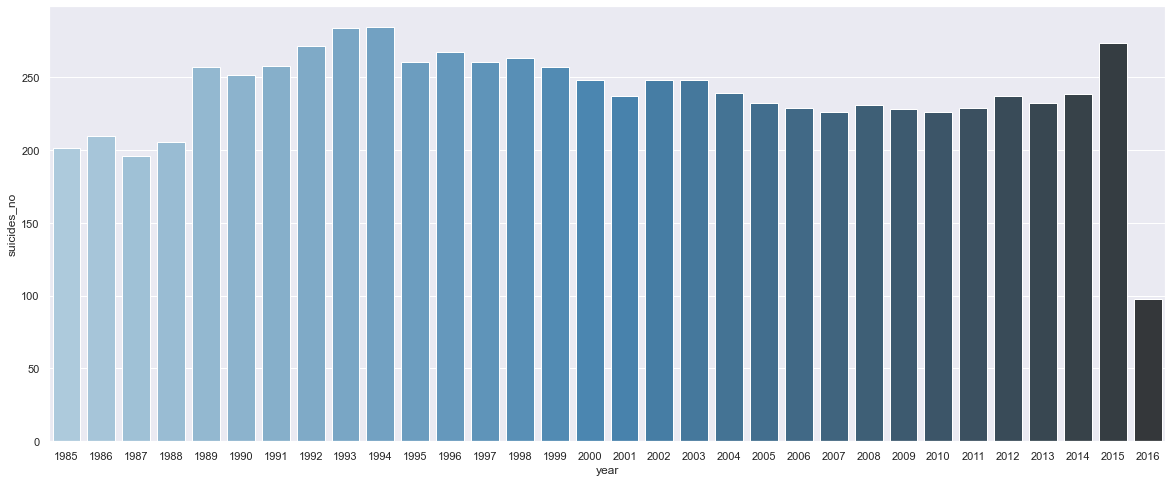

In [118]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x="year",
            y="suicides_no",
            palette="Blues_d",
            data=suicid_df2,
           ci=None);

In [119]:
# Filter countries with 'gdp_per_capita > 10000
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

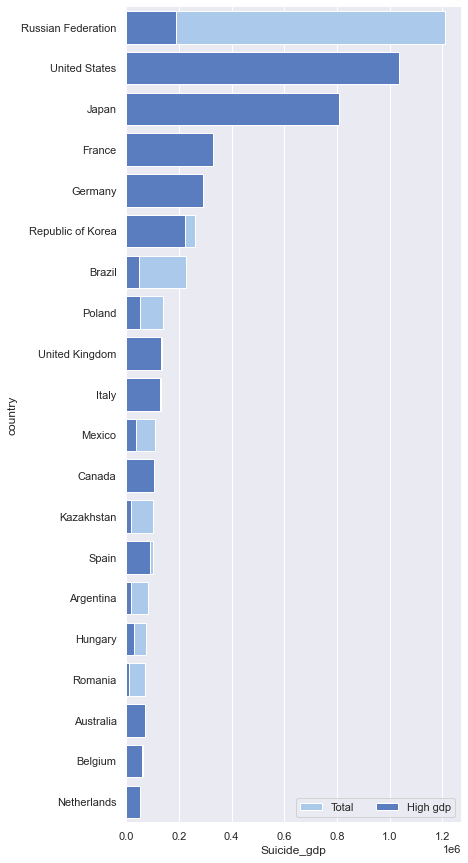

In [120]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

#### Bubble chart

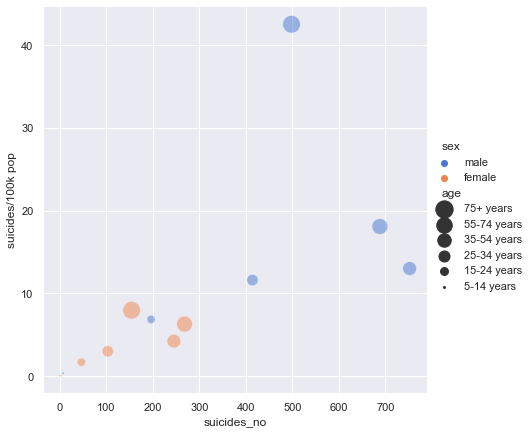

In [121]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

#### 